# 1. Loading Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ************* Others ****************************
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

# 2. Inputing Data

We can see that there are 3 files:**"adult.names","adult.data"and "adult.test"**,on Adult dataset downloaded from https://archive.ics.uci.edu/ml/datasets/adult. 

There fore, We need to preprocess and merge all of 3 files into 1 dataset in order to do EDA and Feature Engineering and so on.

Here, we use powerful tools-- Regular Expression to deal with this problem.



In [74]:
# Apply Regular Expression
import re

# 1.adult.names-header
with open('adult.names') as fp:
    cols = []
    for line in fp:
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('income')

options = {'header': None, 'names': cols, 'skipinitialspace': True}
# 2.Pre_train_adult_data
pre_train_df = pd.read_csv('adult.data', **options)
#3.pre_test_data
pre_test_df = pd.read_csv('adult.test', skiprows=1, **options)
pre_test_df['income'] = pre_test_df['income'].str.rstrip('.')

In [75]:
ad_df3 = pd.concat([pre_train_df,pre_test_df], ignore_index = True)

In [76]:
ad_df3.shape

(48842, 15)

In [77]:
ad_df3.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [78]:
ad_df3.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [79]:
#For numerical value, we do discriptive analysis.
ad_df3.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Conclusion**

Age: Range from 19 to 90 years, average is 37.

Education_num: from 1 and 16 ,the avg education level is 10 years.

hours.per.week:from 1 and 99, and the average is 40 hours.

----


# 3.DataCleanning

In [80]:
# !!!rename the column name with dash,
# if the dataset use dash to connect, we dont need to use this.
# df = df.rename(columns={'capital.gain':'capital-gain','marital.status':'marital-status',
#                       'capital.loss':'capital-loss','hours.per.week':'hours-per-week',
#                       'native.country':'native-country'})

In [81]:
ad_df3.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [82]:
# We find ? in 'workclass', 'occupation' .'native.country'
ad_df3[ad_df3 == '?'] = np.nan
ad_df3.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [83]:
# Using Mode to complete Na value
for col in ['workclass', 'occupation', 'native-country']:
    ad_df3[col].fillna(ad_df3[col].mode()[0], inplace = True)
ad_df3.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 4. Exploratory Data Analysis

## 4.1 Numerical Feature Analysis

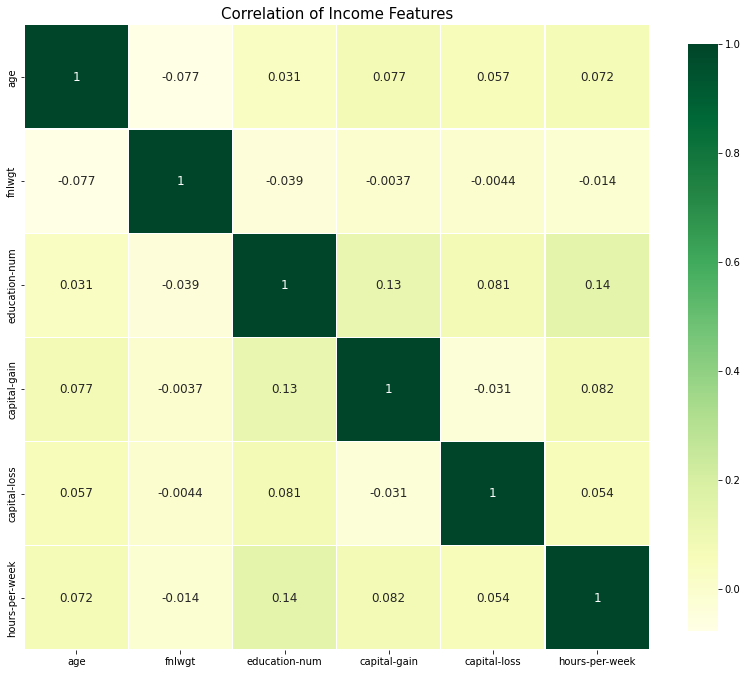

In [84]:
# Heatmap
def correlation_heatmap(ad_df):
    _ , ax = plt.subplots(figsize = (14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        ad_df.corr(), 
        cmap = "YlGn",
        square = True, 
        cbar_kws = {'shrink':.9 }, 
        ax = ax,
        annot = True, 
        linewidths = 0.1,vmax = 1.0, linecolor = 'white',
        annot_kws = {'fontsize':12 }
    )
    
    plt.title('Correlation of Income Features', y = 1.5, size = 15)

correlation_heatmap(ad_df3)

**Conclusion:** 

1st:The hour-per-week are highest positive related with capital gain.

2nd:The Educationa-num are positive related with capital loss

3rd: Age vs capital-gain

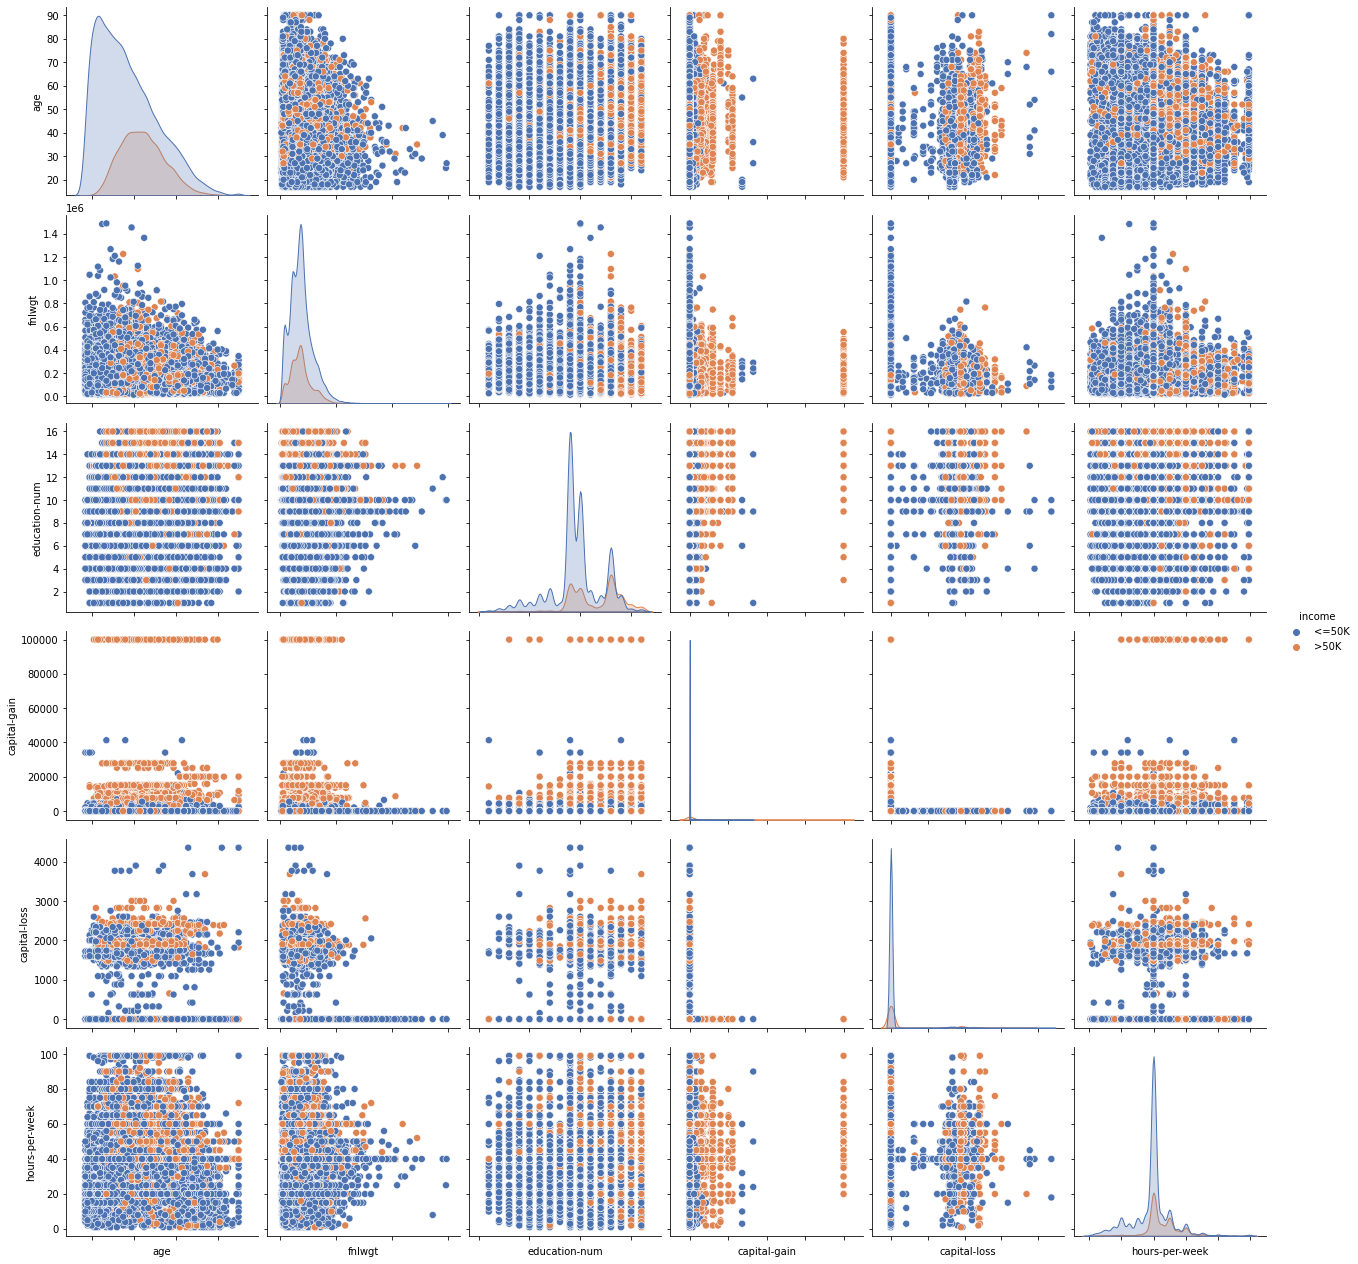

In [85]:
pairplot = sns.pairplot(ad_df3, hue = 'income', palette = 'deep', size = 3, diag_kind = 'kde', diag_kws = dict(shade = True), plot_kws = dict(s = 50))
pairplot.set(xticklabels=[])

# 5. Feauture Engineerning

## 5.3.1 Process Outlier

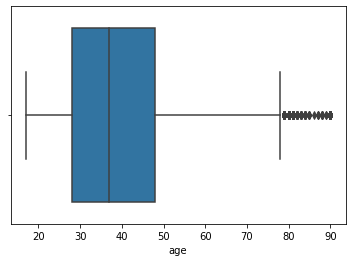

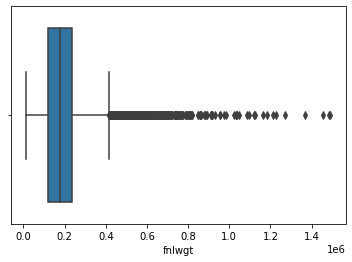

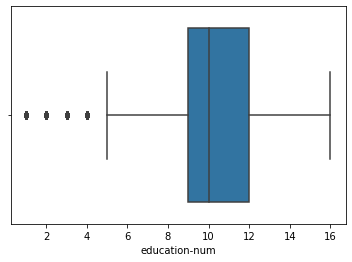

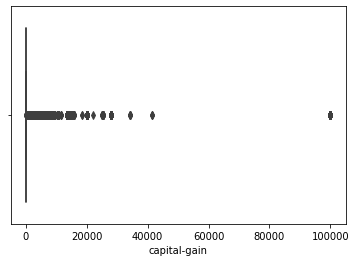

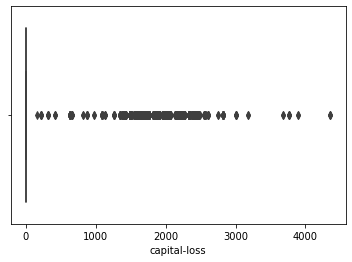

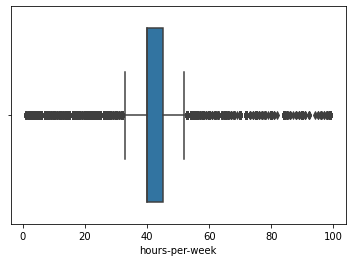

In [86]:
# Outlier
int_columns = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
for i in int_columns:
  sns.boxplot(x = ad_df3[i])
  plt.show()

In [87]:
# Using quantile to process
LQ = ad_df3["fnlwgt"].quantile(0.01)
HQ  = ad_df3["fnlwgt"].quantile(0.99)
ad_df = ad_df3[(ad_df3["fnlwgt"] < HQ) & (ad_df3["fnlwgt"] > LQ)]

In [88]:
print(len(ad_df3), len(ad_df3))
print(LQ, HQ)

48842 48842
27166.0 509484.41999999987


In [89]:
ad_df['education-num'].value_counts()

9     15474
10    10636
13     7863
14     2605
11     2014
7      1785
12     1580
6      1354
4       937
15      827
5       740
8       642
16      583
3       502
2       242
1        79
Name: education-num, dtype: int64

In [90]:
# Based on the graph and set the Low-bound and High-Bound.
ad_df = ad_df[(ad_df['education-num'] <= 16) & (ad_df['education-num'] >= 4)]
ad_df= ad_df[ad_df['capital-gain'] <= 60000]
ad_df= ad_df[ad_df['capital-loss'] <= 3000]
ad_df= ad_df[(ad_df['hours-per-week'] <= 80) & (ad_df['hours-per-week'] >= 20)]

In [91]:
ad_df.shape

(44000, 15)

In [92]:
ad_df3.shape

(48842, 15)

## 5.1 Feature combination and dropout

In [93]:
ad_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [94]:
ad_df = ad_df.drop(['education-num'], axis=1)
ad_df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [95]:
ad_df3 = ad_df3.drop(['education-num'], axis=1)
ad_df3

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [96]:
print('** Edu **:',ad_df.education.unique(), '\n',
      '** Race **:',ad_df.race.unique(),'\n',
      '** Occupation **:',ad_df.occupation.unique(),'\n',
     '** Relationship **:',ad_df.relationship.unique(),'\n',
     '** Sex **:',ad_df.sex.unique(),'\n',
      '** Marital-status **:' , ad_df['marital-status'].unique(),'\n',
      '** native-country **:', ad_df['native-country'].unique()
     )


** Edu **: ['Bachelors' 'HS-grad' '11th' 'Masters' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' '9th' 'Prof-school' '10th' '12th'] 
 ** Race **: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 
 ** Occupation **: ['Adm-clerical' 'Handlers-cleaners' 'Prof-specialty' 'Exec-managerial'
 'Sales' 'Craft-repair' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Other-service' 'Tech-support' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 
 ** Relationship **: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 
 ** Sex **: ['Male' 'Female'] 
 ** Marital-status **: ['Never-married' 'Divorced' 'Married-civ-spouse' 'Separated'
 'Married-spouse-absent' 'Widowed' 'Married-AF-spouse'] 
 ** native-country **: ['United-States' 'Cuba' 'India' 'Mexico' 'South' 'Puerto-Rico' 'Honduras'
 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Italy' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portug

In [97]:
ad_df_GNB=ad_df.copy(deep = True)

### Categorical Feature Combining

In [98]:
# 1.Categorical Feature Combining
ad_df['education'].replace([ 'Preschool', '1st-4th','5th-6th','7th-8th','9th', '10th','11th',  '12th'],
                             'Drop_at_School_level', inplace = True)
ad_df['education'].replace(['Some-college','Assoc-acdm','Assoc-voc' ],'College',inplace=True)

ad_df['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse' ],'Married-spouse',inplace=True)
ad_df['native-country'].replace(['England','Scotland'],'UK',inplace=True)
ad_df['native-country'].replace(['Portugal','Germany','Italy','Yugoslavia','Hungary',
                                'Greece', 'Poland','France' ,'Holand-Netherlands'],'Other-Europe',inplace=True)
ad_df['native-country'].replace(['Philippines','Vietnam','Thailand','Cambodia','Laos','Japan','India','Iran'],'Other-Asia',inplace=True)
ad_df['native-country'].replace(['United-States','Puerto-Rico','Outlying-US(Guam-USVI-etc)','Canada'],'North-America',inplace=True)
ad_df['native-country'].replace(['China','Taiwan','Hong'],'China',inplace=True)
ad_df['native-country'].replace(['Peru','Mexico','Dominican-Republic','Haiti',
                              'Cuba','Guatemala','Columbia','Nicaragua', 'Honduras',
                               'Jamaica' ,'Ecuador','El-Salvador','Trinadad&Tobago'] , 'Latin-America',inplace=True)

In [99]:
ad_df_GNB

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,Private,321403,HS-grad,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [100]:
# 1.Categorical Feature Combining for baseline
ad_df3['education'].replace([ 'Preschool', '1st-4th','5th-6th','7th-8th','9th', '10th','11th',  '12th'],
                             'Drop_at_School_level', inplace = True)
ad_df3['education'].replace(['Some-college','Assoc-acdm','Assoc-voc' ],'College',inplace=True)

ad_df3['marital-status'].replace(['Married-AF-spouse','Married-civ-spouse' ],'Married-spouse',inplace=True)

ad_df3['native-country'].replace(['England','Scotland'],'UK',inplace=True)
ad_df3['native-country'].replace(['Portugal','Germany','Italy','Yugoslavia','Hungary',
                                'Greece', 'Poland','France' ,'Holand-Netherlands'],'Other-Europe',inplace=True)
ad_df3['native-country'].replace(['Philippines','Vietnam','Thailand','Cambodia','Laos','Japan','India','Iran'],'Other-Asia',inplace=True)
ad_df3['native-country'].replace(['United-States','Puerto-Rico','Outlying-US(Guam-USVI-etc)','Canada'],'North-America',inplace=True)
ad_df3['native-country'].replace(['China','Taiwan','Hong'],'China',inplace=True)
ad_df3['native-country'].replace(['Peru','Mexico','Dominican-Republic','Haiti',
                              'Cuba','Guatemala','Columbia','Nicaragua', 'Honduras',
                               'Jamaica' ,'Ecuador','El-Salvador','Trinadad&Tobago'] , 'Latin-America',inplace=True)

### Continuous Feature Binning

In [101]:
#Binning Function
def Binning(df,col,method,bins):
#     需要判断类型
    uniqs=df[col].nunique()
    if uniqs<=bins:
        raise KeyError('nunique is smaller than bins: '+col)
        return 
#     左开右闭
    def ff(x,fre_list):
        if x<=fre_list[0]:
            return 0
        elif x>fre_list[-1]:
            return len(fre_list)-1
        else :
            for i in range(len(fre_list)-1):
                if x>fre_list[i] and x<=fre_list[i+1]:
                    return i
# 等距分箱
    if method=='distance':
        umax=np.percentile(df[col],99.99)
        umin=np.percentile(df[col],0.01)
        step=(umax-umin)/bins
        fre_list=[umin+i*step for i in range(bins+1)]
        return df[col].map(lambda x:ff(x,fre_list))
#等频分箱
    elif method=='frequency' :
        fre_list=[np.percentile(df[col],100/bins*i) for i in range(bins+1)]
        fre_list=sorted(list(set(fre_list)))
        return df[col].map(lambda x:ff(x,fre_list))


In [102]:
ad_df['fnlwgt'] = Binning(df = ad_df, col = 'fnlwgt',method='frequency',bins=5)

In [103]:
ad_df3['fnlwgt'] = Binning(df = ad_df3, col = 'fnlwgt',method='frequency',bins=5)

In [104]:
ad_df['age'] = Binning(df = ad_df, col = 'age',method='frequency',bins=5)

In [105]:
ad_df3['age'] = Binning(df = ad_df3, col = 'age',method='frequency',bins=5)

In [106]:
ad_df['hours-per-week'] = Binning(df = ad_df, col = 'hours-per-week',method='distance',bins=5)

In [107]:
ad_df3['hours-per-week'] = Binning(df = ad_df3, col = 'hours-per-week',method='distance',bins=5)

In [108]:
[np.percentile(ad_df['hours-per-week'],100/5*i) for i in range(5+1)]
#so we use distance instead of frequency method to binning

[0.0, 1.0, 1.0, 1.0, 2.0, 4.0]

In [109]:
print('Fnlwgt',ad_df['fnlwgt'].value_counts())
print('Age',ad_df['age'].value_counts())
print('hours-per-week',ad_df['hours-per-week'].value_counts())


Fnlwgt 2    8801
0    8800
4    8800
1    8800
3    8799
Name: fnlwgt, dtype: int64
Age 2    9511
0    9242
3    8530
1    8365
4    8352
Name: age, dtype: int64
hours-per-week 1    25945
2     9174
0     5460
3     2585
4      836
Name: hours-per-week, dtype: int64


In [110]:
ad_df.loc[ad_df['capital-gain']!=0, 'capital-gain'] = Binning(df = ad_df[ad_df['capital-gain']!=0], col = 'capital-gain', method = 'frequency', bins = 4) + 1
ad_df['capital-gain'].value_counts()

0    40494
1      900
2      886
4      874
3      846
Name: capital-gain, dtype: int64

In [111]:
ad_df.loc[ad_df['capital-loss']!=0, 'capital-loss'] = Binning(df = ad_df[ad_df['capital-loss']!=0], col = 'capital-loss', method = 'frequency', bins = 4) + 1
ad_df['capital-loss'].value_counts()

0    41891
3      563
1      544
2      537
4      465
Name: capital-loss, dtype: int64

## 5.2 Encoding Categorical feature

In [112]:
ad_df['income']=ad_df['income'].map({'<=50K': 0, '>50K': 1})

In [113]:
ad_df3['income']=ad_df3['income'].map({'<=50K': 0, '>50K': 1})

In [114]:
ad_df_GNB['income']=ad_df_GNB['income'].map({'<=50K': 0, '>50K': 1})

In [115]:
from sklearn.preprocessing import LabelEncoder
categ = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
le = LabelEncoder()
for col in categ:
    le.fit(ad_df[col])
    ad_df[col] = le.transform(ad_df[col])

In [116]:
categ3 = ['workclass','education', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','native-country']
le3 = LabelEncoder()
for col in categ3:
    le3.fit(ad_df3[col])
    ad_df3[col] = le3.transform(ad_df3[col])

In [117]:
le_GNB = LabelEncoder()
for col in ad_df_GNB.columns[:-1]:
  le_GNB.fit(ad_df_GNB[col])
  ad_df_GNB[col] = le_GNB.transform(ad_df_GNB[col])

In [118]:
ad_df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,2,6,0,0,3,0,1,4,1,1,0,1,3,0
2,2,3,3,4,0,5,1,4,1,0,0,1,3,0
3,4,3,3,3,1,5,0,2,1,0,0,1,3,0
4,1,3,4,0,1,9,5,2,0,0,0,1,2,0
5,2,3,4,5,1,3,5,4,0,0,0,1,3,0


## 5.3 Optimization of data

## 5.3.1 Hypothesis Test

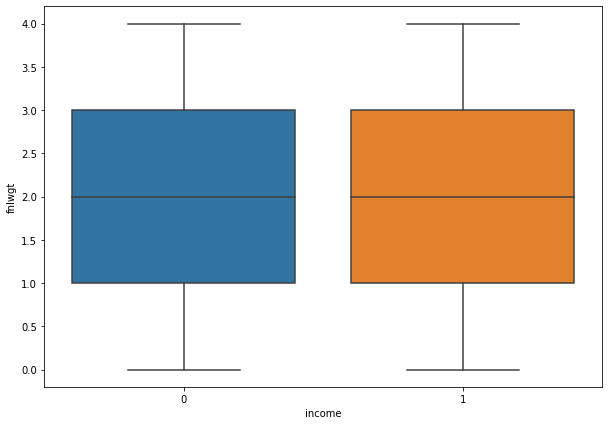

In [119]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=ad_df)
plt.show()

In [120]:
ad_df

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,2,6,0,0,3,0,1,4,1,1,0,1,3,0
2,2,3,3,4,0,5,1,4,1,0,0,1,3,0
3,4,3,3,3,1,5,0,2,1,0,0,1,3,0
4,1,3,4,0,1,9,5,2,0,0,0,1,2,0
5,2,3,4,5,1,3,5,4,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,3,3,0,0,9,1,4,0,0,0,1,3,0
48838,4,3,4,4,5,9,2,2,1,0,0,1,3,0
48839,2,3,4,0,1,9,0,4,1,0,0,2,3,0
48840,3,3,0,0,0,0,3,1,1,2,0,1,3,0


In [121]:
import random
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

ad_df2 = ad_df[(np.abs(stats.zscore(ad_df["fnlwgt"])) < 3)] 

income_1 = ad_df2[ad_df['income']==1]["fnlwgt"]
income_0 = ad_df2[ad_df['income']==0]["fnlwgt"]

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)

if pval <0.05:
    print("we reject null hypothesis",'\n',
    'Accept Alternative hypothesis: exist difference between two group of income(>50k and<=50k.) ')
else:
    print("we accept null hypothesis(no difference between mean of two group of income(>50k and<=50k.)")


ttest -1.530057615258807
p-value 0.1276297772810171
we accept null hypothesis(no difference between mean of two group of income(>50k and<=50k.)


**Conclusion:**
By applying the  statistical analysis in two sample t-test,

The conclusion is that there no difference between two group of income(>50k and<=50k which means that the feature 'flnwgt' has no contribution to the classify income group.
Therefore, we decide to drop this feature.

----------

In [122]:
ad_df2=ad_df.drop(['fnlwgt'], axis=1)
ad_df2

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,2,6,0,3,0,1,4,1,1,0,1,3,0
2,2,3,4,0,5,1,4,1,0,0,1,3,0
3,4,3,3,1,5,0,2,1,0,0,1,3,0
4,1,3,0,1,9,5,2,0,0,0,1,2,0
5,2,3,5,1,3,5,4,0,0,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,3,0,0,9,1,4,0,0,0,1,3,0
48838,4,3,4,5,9,2,2,1,0,0,1,3,0
48839,2,3,0,1,9,0,4,1,0,0,2,3,0
48840,3,3,0,0,0,3,1,1,2,0,1,3,0


## 5.4 Split dataset

In [123]:
from sklearn.model_selection import train_test_split
X = ad_df.drop(['income'], axis=1)
y = ad_df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Baseline
X3 =ad_df3.drop(['income'], axis=1)
y3 = ad_df3['income']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 0)

In [124]:
# Gaussian Naive Bayes
X_GNB =ad_df_GNB.drop(['income'], axis=1)
y_GNB = ad_df_GNB['income']

X_GNB_train, X_GNB_test, y_GNB_train, y_GNB_test = train_test_split(X_GNB, y_GNB, test_size = 0.3, random_state = 0)

## 5.4.5 Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
y_train.index = range(len(y_train))
y_test.index = range(len(y_test))

# Baseline
X3_train = pd.DataFrame(scaler.fit_transform(X3_train), columns = X3.columns)
X3_test = pd.DataFrame(scaler.transform(X3_test), columns = X3.columns)
y3_train.index = range(len(y3_train))
y3_test.index = range(len(y3_test))

In [126]:
# Gaussian Naive Bayes
X_GNB_train = pd.DataFrame(scaler.fit_transform(X_GNB_train), columns = X_GNB.columns)
X_GNB_test = pd.DataFrame(scaler.transform(X_GNB_test), columns = X_GNB.columns)
y_GNB_train.index = range(len(y_GNB_train))
y_GNB_test.index = range(len(y_GNB_test))

In [127]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#After optimization
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(30800, 13) (13200, 13) (30800,) (13200,)
(34189, 13) (14653, 13) (34189,) (14653,)


# 6. PCA

In [128]:
class myPCA:
    def __init__(self, X, n_components = None, explained_variance_ratio = 0.80):
        self.X = np.array(X)
        self.dim = self.X.shape[1]
        
        if n_components and n_components >= self.dim:
            print('Warning: Number of principal components exceeds feature dimensions!')
            
        self.n_components = n_components
        self.explained_variance_ratio = explained_variance_ratio

        self.eMat_sorted = self.get_eigenValue_eigenVector()
        self.var = self.eMat_sorted.values[:, 0]
        self.ratio = self.var / sum(self.var)


    def get_eigenValue_eigenVector(self):
        eVal, eVec = np.linalg.eig(np.cov(self.X.T))
        eMat = np.hstack((eVal.reshape((eVal.shape[0],1)), eVec))
        eMat_sorted = pd.DataFrame(eMat).sort_values(by = 0, ascending = False)

        return eMat_sorted


    def reduceDimension(self):
        pc_name = []

        # Using number of principal components
        if self.n_components:
          for i in range(self.n_components):
            pc_name.append('PC{}'.format(i+1))
          pc = self.eMat_sorted.values[0:self.n_components, 1:]
          Y = np.dot(pc, self.X.T)
          pc_df = pd.DataFrame(Y.T, columns = pc_name)
          
          return pc_df
        
        # Using explained variance ratio
        cumulative_ratio = 0

        for i in range(self.dim):
          cumulative_ratio += self.ratio[i]
          pc_name.append('PC{}'.format(i+1))
          if cumulative_ratio >= self.explained_variance_ratio: 
            pc = self.eMat_sorted.values[0:i+1, 1:]         
            Y = np.dot(pc, self.X.T)            
            pc_df = pd.DataFrame(Y.T, columns = pc_name)

            return pc_df

    def plotRatio(self):
        cumulative_ratio = 0
        self.cumulative_ratio = []
        for i in range(self.dim):
          cumulative_ratio += self.ratio[i]
          self.cumulative_ratio.append(cumulative_ratio)

        pc_name = []
        for i in range(self.dim):
          pc_name.append('PC{}'.format(i+1))
        plt.figure(figsize = (16, 9), dpi = 80)
        plt.bar(pc_name, self.cumulative_ratio, label = 'Cumulative')
        plt.bar(pc_name, self.ratio, color = 'orange', label = 'Individual')
        plt.xticks(fontsize = 14)
        plt.yticks(fontsize = 14)
        plt.xlabel('Principal Components', labelpad = 30, fontsize = 20)
        plt.ylabel('Proportion of Variance Explained', labelpad = 30, fontsize = 20)
        for i, j in zip(range(self.dim), self.ratio):
          plt.text(i, j+0.008, format(j, '.2%'), ha = 'center', va = 'bottom', fontsize = 12)
        for i, j in zip(range(self.dim), self.cumulative_ratio):
          plt.text(i, j+0.008, format(j, '.2%'), ha = 'center', va = 'bottom', fontsize = 12)
        plt.legend(fontsize = 'xx-large')
        plt.show()

In [129]:
# mypca = myPCA(X_train)
mypca = myPCA(X_train, n_components = 8)
# mypca = myPCA(X_train, explained_variance_ratio = 0.90)

In [130]:
mypca.reduceDimension()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.218995,0.277828,-0.060333,1.540431,0.351606,1.374546,-0.032192,0.171047
1,1.379780,1.063870,-0.648476,-0.812206,1.167614,1.111867,-0.747655,0.287209
2,-0.100454,-1.590436,0.992310,2.830523,-1.561934,-0.068092,-1.476148,0.134367
3,0.461370,-0.155382,0.056070,0.295085,0.755441,1.424625,-0.666938,0.966062
4,1.143855,0.190078,0.021007,-0.326822,0.736464,0.723485,0.186325,1.113268
...,...,...,...,...,...,...,...,...
30795,0.128085,-0.382691,0.408340,0.089058,0.763180,1.178689,-0.783291,1.338452
30796,0.809679,-0.308018,-0.053261,0.607792,-1.402299,-1.974415,1.263698,-0.012552
30797,1.241190,1.966725,-0.308573,0.222738,0.344842,1.020234,-0.050374,-1.035792
30798,-0.846288,0.268193,1.024374,-1.278032,0.375557,0.622685,-1.024021,-1.172032


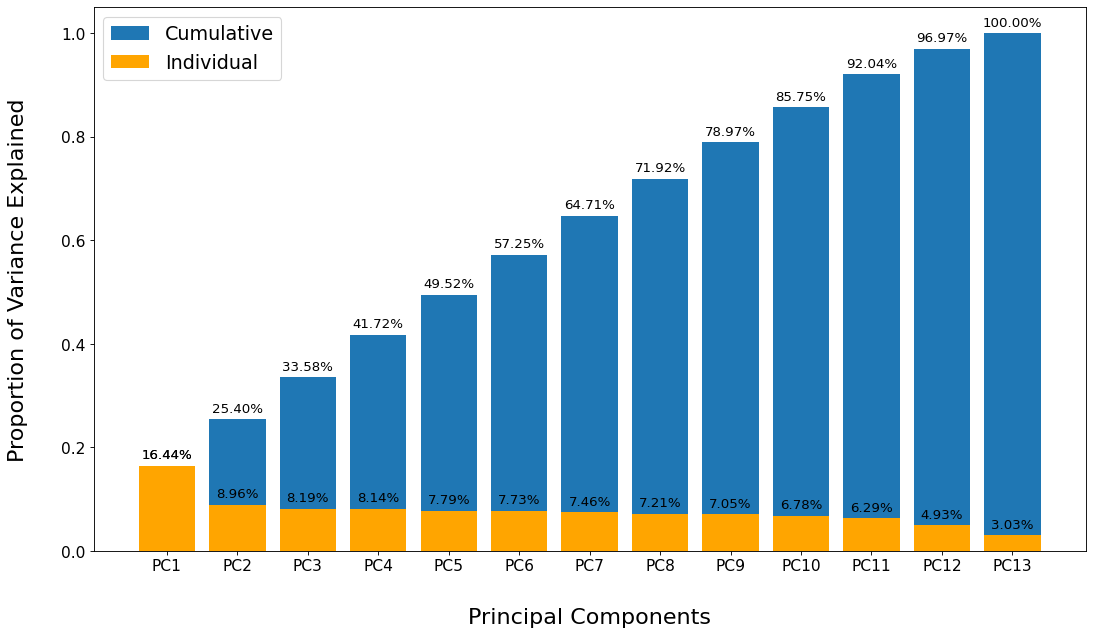

In [131]:
mypca.plotRatio()

In [132]:
# After optimization
X2 =ad_df2.drop(['income','hours-per-week',	'native-country'], axis=1)
y2 = ad_df2['income']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [133]:
# After PCA and Hypothesis
X2_train = pd.DataFrame(scaler.fit_transform(X2_train), columns = X2.columns)
X2_test = pd.DataFrame(scaler.transform(X2_test), columns = X2.columns)
y2_train.index = range(len(y2_train))
y2_test.index = range(len(y2_test))

In [134]:
print(X3_train.shape)
print(X_train.shape)
print(X2_train.shape)

(34189, 13)
(30800, 13)
(30800, 10)


# 7. Logistic Regression

In [135]:
from tqdm import tqdm

In [136]:
class LogisitcRegression:
  def __init__(
      self, 
      X_train, y_train, X_test, y_test, 
      learningRate = 0.01, 
      tolerance = 0.001, 
      maxIteration = 1000
  ) -> None:
    self.X_train = np.array(X_train)
    self.y_train = np.array(y_train)
    self.X_test = np.array(X_test)
    self.y_test = np.array(y_test)
    self.learningRate = learningRate
    self.tolerance = tolerance
    self.maxIteration = maxIteration

  
  def sigmoid(self, z):
    sig = 1/ (1+ np.exp(-z))
    return sig

  def costFunction(self):
    sig = self.sigmoid(self.X_train.dot(self.w))
    pred = self.y_train * np.log(sig) + (1-self.y_train) * np.log(1- sig)
    cost = - pred.sum()

    return cost

  def gradient(self):
    sig = self.sigmoid(self.X_train.dot(self.w))
    grad = (sig - self.y_train).dot(self.X_train)
    return grad

  def gradientDescent(self):
    errors = []
    last_error = float('inf')

    for i in tqdm(range(self.maxIteration)):
      self.w = self.w - self.learningRate * self.gradient()
      current_error = self.costFunction()
      diff = last_error - current_error
      last_error = current_error
      errors.append(current_error)
      
      if diff < self.tolerance:
        print('Model stopped learning')
        break
    return
  

  def fit(self):
    print('Solving using gradient descent')
    self.w = np.ones(self.X_train.shape[1], dtype = np.float64) * 0
    self.gradientDescent()

    self.y_test_hat = self.predict()
    accurancy, precision, recall, F1_score = self.evaluate()
    
    print('')
    print('Accurancy is {}.'.format(accurancy))
    print('Precision is {}.'.format(precision))
    print('Recall is {}.'.format(recall))
    print('F1 Score is {}'.format(F1_score))
  

  def predict(self):
    sig = self.sigmoid(self.X_test.dot(self.w))

    return np.around(sig)


  def evaluate(self):
    accurancy = (np.array(self.y_test_hat, dtype = np.int64) == np.array(self.y_test)).sum() / len(self.y_test_hat)
    precision = (np.array(self.y_test_hat, dtype = np.int64) & np.array(self.y_test)).sum() / sum(self.y_test_hat)
    recall = (np.array(self.y_test_hat, dtype = np.int64) & np.array(self.y_test)).sum() / sum(self.y_test)
    F1_score = 2*precision*recall / (precision + recall)

    return accurancy, precision, recall, F1_score

In [137]:
lr = LogisitcRegression(X_train, y_train, X_test, y_test, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)
lr2 = LogisitcRegression(X2_train, y2_train, X2_test, y2_test, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)
lr3 = LogisitcRegression(X3_train, y3_train, X3_test, y3_test, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)

In [138]:
lr.fit()

Solving using gradient descent


100%|██████████| 1000/1000 [00:08<00:00, 120.07it/s]


Accurancy is 0.6885606060606061.
Precision is 0.4394485351715494.
Recall is 0.8403235470341522.
F1 Score is 0.5771011212838185


In [139]:
lr2.fit()

Solving using gradient descent


100%|██████████| 1000/1000 [00:08<00:00, 118.95it/s]



Accurancy is 0.6962878787878788.
Precision is 0.4457558609539208.
Recall is 0.8259436788496105.
F1 Score is 0.5790192166334138


In [140]:
lr3.fit()

Solving using gradient descent


100%|██████████| 1000/1000 [00:10<00:00, 97.37it/s]


Accurancy is 0.5608407834573125.
Precision is 0.20856137607505865.
Recall is 0.30900666087460177.
F1 Score is 0.2490372272143774


# 8. Gaussian Naive Bayes

In [141]:
from scipy.stats import norm

In [142]:
class GaussianNaiveBayes:
  def __init__(self, X_train, y_train, X_test, y_test) -> None:
      self.X_train = np.array(X_train)
      self.y_train = np.array(y_train)
      self.X_test = np.array(X_test)
      self.y_test = np.array(y_test)

  
  def fitDistribution(self, data):
    mean = np.mean(data)
    std = np.std(data)
    dist = norm(mean, std)
    return dist

  
  def probability(self, x, prior, dist):
    prob = prior

    for i, d in enumerate(dist):
      prob *= d.pdf(x[i])

    return prob


  def fit(self):
    X0_train = self.X_train[self.y_train == 0]           # number of points belonging to class 0
    X1_train = self.X_train[self.y_train == 1]           # number of points belonging to class 1

    self.prior0 = len(X0_train) / len(self.X_train)
    self.prior1 = len(X1_train) / len(self.X_train)

    self.X0_dist = np.array([])
    self.X1_dist = np.array([])

    for i in range(self.X_train.shape[1]):
      X0_dist_i = self.fitDistribution(X0_train[:, i])               # dimension i of class 0
      X1_dist_i = self.fitDistribution(X1_train[:, i])               # dimension i of class 1

      self.X0_dist = np.append(self.X0_dist, X0_dist_i)
      self.X1_dist = np.append(self.X1_dist, X1_dist_i)


  def predict(self):
    self.pred = []
    self.actual = []
    for sample, target in zip(self.X_test, self.y_test):
      py0 = self.probability(sample, self.prior0, self.X0_dist)
      py1 = self.probability(sample, self.prior1, self.X1_dist)
      z = py0 + py1

      self.pred.append(np.argmax([py0, py1]))
      self.actual.append(target)


  def score(self):
    self.accuracy = (np.array(self.pred) == np.array(self.actual)).sum() / len(self.pred)
    self.precision = (np.array(self.pred) & np.array(self.actual)).sum() / sum(self.pred)
    self.recall = (np.array(self.pred) & np.array(self.actual)).sum() / sum(self.actual)
    self.F1_score = 2*self.precision*self.recall / (self.precision + self.recall)

    print('Accuracy is {}.'.format(self.accuracy))
    print('Precision is {}.'.format(self.precision))
    print('Recall is {}.'.format(self.recall))
    print('F1 Score is {}'.format(self.F1_score))

In [143]:
# clf = GaussianNaiveBayes(X_train, y_train, X_test, y_test)
# clf.fit()
# clf.predict()

# clf2 = GaussianNaiveBayes(X2_train, y2_train, X2_test, y2_test)
# clf2.fit()
# clf2.predict()

# clf3 = GaussianNaiveBayes(X3_train, y3_train, X3_test, y3_test)
# clf3.fit()
# clf3.predict()

In [144]:
# clf.score()
# print('')
# clf2.score()
# print('')
# clf3.score()

In [145]:
# clf_test = GaussianNaiveBayes(X3_train, y3_train, X3_train, y3_train)
# clf_test.fit()
# clf_test.predict()
# clf_test.score()

In [146]:
clf_GNB = GaussianNaiveBayes(X_GNB_train, y_GNB_train, X_GNB_test, y_GNB_test)
clf_GNB.fit()
clf_GNB.predict()

In [147]:
clf_GNB.score()

Accuracy is 0.7867424242424242.
Precision is 0.6265118529269472.
Recall is 0.38795686039544636.
F1 Score is 0.4791859389454209


In [148]:
clf_GNB_test = GaussianNaiveBayes(X_GNB_train, y_GNB_train, X_GNB_train, y_GNB_train)
clf_GNB_test.fit()
clf_GNB_test.predict()
clf_GNB_test.score()

Accuracy is 0.7909415584415584.
Precision is 0.6171727748691099.
Recall is 0.3899179677163271.
F1 Score is 0.47790480823806053


# 9. Decision Tree

In [149]:
# Random selections
import random 

# Quick value count calculator
from collections import Counter


class DecisionTree: 
    """
    Class for creating the nodes for a decision tree 
    """
    def __init__(
        self, 
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        X_features_fraction=None,
        node_type=None,
        rule=None
    ):
        # Saving the data to the node 
        self.Y = Y 
        self.X = X

        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5


        # Default current depth of node 
        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        # Saving the hyper parameters specific to the random forest 
        self.X_features_fraction = X_features_fraction if X_features_fraction is not None else 1.0

        # Type of node 
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting 
        self.rule = rule if rule else ""

        # Calculating the counts of Y in the node 
        self.counts = Counter(Y)

        # Getting the GINI impurity based on the Y distribution
        self.gini_impurity = self.get_GINI()

        # Sorting the counts and saving the final prediction of the node 
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))

        # Getting the last item
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]

        # Saving to object attribute. This node will predict the class with the most frequent class
        self.yhat = yhat

        # Saving the number of observations in the node 
        self.n = len(Y)

        # Initiating the left and right nodes as empty nodes
        self.left = None 
        self.right = None 

        # Default values for splits
        self.best_feature = None 
        self.best_value = None 

    def get_random_X_colsample(self):
      # Getting the random subset of features 
      n_ft = int(self.n_features * self.X_features_fraction)

      # Selecting random features without repetition
      features = random.sample(self.features, n_ft)

      # Subseting the X to chosen features 
      X = self.X[features].copy()

      # Returning the subseted features
      return X 

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
        # Ensuring the correct types
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        # Getting the total observations
        n = y1_count + y2_count
        
        # If n is 0 then we return the lowest possible gini impurity
        if n == 0:
            return 0.0

        # Getting the probability to see each of the classes
        p1 = y1_count / n
        p2 = y2_count / n
        
        # Calculating GINI 
        gini = 1 - (p1 ** 2 + p2 ** 2)
        
        # Returning the gini impurity
        return gini

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def get_GINI(self):
        """
        Function to calculate the GINI impurity of a node 
        """
        # Getting the 0 and 1 counts
        y1_count, y2_count = self.counts.get(0, 0), self.counts.get(1, 0)

        # Getting the GINI impurity
        return self.GINI_impurity(y1_count, y2_count)

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        GINI_base = self.get_GINI()

        # Finding which split yields the best GINI gain 
        max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Spliting the dataset 
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

                # Getting the Y distribution from the dicts
                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)

                # Getting the left and right gini impurities
                gini_left = self.GINI_impurity(y0_left, y1_left)
                gini_right = self.GINI_impurity(y0_right, y1_right)

                # Getting the obs count from the left and the right data splits
                n_left = y0_left + y1_left
                n_right = y0_right + y1_right

                # Calculating the weights for each of the nodes
                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                # Calculating the weighted GINI impurity
                wGINI = w_left * gini_left + w_right * gini_right

                # Calculating the GINI gain 
                GINIgain = GINI_base - wGINI

                # Checking if this is the best split so far 
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value 

                    # Setting the best gain to the current one 
                    max_gain = GINIgain

        return (best_feature, best_value)


    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a df from the data 
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further 
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split 
            best_feature, best_value = self.best_split()

            if best_feature is not None:
              # Saving the best split to the current node 
              self.best_feature = best_feature
              self.best_value = best_value

              if self.best_feature is not None:
                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = DecisionTree(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = DecisionTree(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()


    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        # Defining the number of spaces 
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")   

    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
        
        if self.right is not None:
            self.right.print_tree()

    def predict(self, X:pd.DataFrame, y):
        """
        Batch prediction method
        """
        self.pred = []
        self.actual = list(y)

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            self.pred.append(self.predict_obs(values))
        

    def predict_obs(self, values: dict) -> int:
        """
        Method to predict the class given a set of features
        """
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
            # Traversing the nodes all the way to the bottom
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value

            if best_feature is None:
              return cur_node.yhat

            if cur_node.n < cur_node.min_samples_split:
                break

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right
            
        return cur_node.yhat
    
    def score(self):
      self.accuracy = (np.array(self.pred) == np.array(self.actual)).sum() / len(self.pred)
      self.precision = (np.array(self.pred) & np.array(self.actual)).sum() / sum(self.pred)
      self.recall = (np.array(self.pred) & np.array(self.actual)).sum() / sum(self.actual)
      self.F1_score = 2*self.precision*self.recall / (self.precision + self.recall)

      print('Accuracy is {}.'.format(self.accuracy))
      print('Precision is {}.'.format(self.precision))
      print('Recall is {}.'.format(self.recall))
      print('F1 Score is {}'.format(self.F1_score))

## Create Tree

In [150]:
# Setting the available hyper parameters of a tree
hp = {
    'max_depth': 8,
    'min_samples_split': 500
}

In [151]:
# Initiating a Decision Tree
dt = DecisionTree(list(y_train), X_train, **hp)
# Getting the best split
dt.grow_tree()
# Printing the tree information 
dt.print_tree()

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {0: 23242, 1: 7558}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.573
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {1: 5777, 0: 6862}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 3.149
                   | GINI impurity of the node: 0.49
                   | Class distribution in the node: {1: 4984, 0: 6855}
                   | Predicted class: 0
|------------------------ Split rule: education <= -1.07
                           | GINI impurity of the node: 0.46
                           | Class distribution in the node: {1: 1342, 0: 745}
                           | Predicted class: 1
|-------------------------------- Split rule: capital-loss <= 2.345
                                   | GINI impurity of the node: 0.48
                                   | Class distribution in the node: {1: 1154, 0: 737}
      

In [152]:
# Initiating a Decision Tree
dt2 = DecisionTree(list(y2_train), X2_train, **hp)
# Getting the best split
dt2.grow_tree()
# Printing the tree information
dt2.print_tree()

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {0: 23242, 1: 7558}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.573
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {1: 5777, 0: 6862}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 3.149
                   | GINI impurity of the node: 0.49
                   | Class distribution in the node: {1: 4984, 0: 6855}
                   | Predicted class: 0
|------------------------ Split rule: education <= -1.07
                           | GINI impurity of the node: 0.46
                           | Class distribution in the node: {1: 1342, 0: 745}
                           | Predicted class: 1
|-------------------------------- Split rule: capital-loss <= 2.345
                                   | GINI impurity of the node: 0.48
                                   | Class distribution in the node: {1: 1154, 0: 737}
      

In [153]:
# Initiating a Decision Tree
dt3 = DecisionTree(list(y3_train), X3_train, **hp)
# Getting the best split
dt3.grow_tree()
# Printing the tree information
dt3.print_tree()

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {0: 25955, 1: 8234}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.589
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {0: 7618, 1: 6253}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 0.537
                   | GINI impurity of the node: 0.48
                   | Class distribution in the node: {0: 7605, 1: 5135}
                   | Predicted class: 0
|------------------------ Split rule: capital-loss <= 4.384
                           | GINI impurity of the node: 0.47
                           | Class distribution in the node: {0: 7499, 1: 4552}
                           | Predicted class: 0
|-------------------------------- Split rule: education <= -1.087
                                   | GINI impurity of the node: 0.48
                                   | Class distribution in the node: {1: 1219, 0: 827}
    

## Predict

In [154]:
dt.predict(X_test, y_test)
dt.score()

Accuracy is 0.8356818181818182.
Precision is 0.7557986870897155.
Recall is 0.5173756740563211.
F1 Score is 0.6142628490129823


In [155]:
dt2.predict(X2_test, y2_test)
dt2.score()

Accuracy is 0.8336363636363636.
Precision is 0.7663246268656716.
Recall is 0.49221090473337326.
F1 Score is 0.5994162714337832


In [156]:
dt3.predict(X3_test, y3_test)
dt3.score()

Accuracy is 0.8564799017266089.
Precision is 0.8085009140767825.
Recall is 0.5123081378511439.
F1 Score is 0.6271937599716362


# 10. Random Forest

In [157]:
from tqdm import tqdm

class RandomForestClassifier():
    """
    Class that creates a random forest for classification problems
    """
    def __init__(
        self,
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        n_trees=None,
        X_features_fraction=None,
        X_obs_fraction=None
    ):  
        # Saving the data for the random forest
        self.Y = Y 
        self.X = X

        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

        # Saving the final feature list 
        self.features = list(X.columns)

        # Getting the number of features 
        self.n_features = len(self.features)

        # Saving the hyper parameters specific to the random forest 
        self.n_trees = n_trees if n_trees is not None else 30
        self.X_features_fraction = X_features_fraction if X_features_fraction is not None else 1.0
        self.X_obs_fraction = X_obs_fraction if X_obs_fraction is not None else 1.0

    def bootstrap_sample(self):
        """
        Function that creates a bootstraped sample with the class instance parameters 
        """
        # Sampling the number of rows with repetition
        Xbootstrap = self.X.sample(frac=self.X_obs_fraction, replace=True) 

        # Getting the index of samples 
        indexes = Xbootstrap.index

        # Getting the corresponding Y variables
        Ybootstrap = [self.Y[x] for x in indexes]

        # Droping the index of X 
        Xbootstrap.reset_index(inplace=True, drop=True)

        # Returning the X, Y pair
        return Xbootstrap, Ybootstrap

    def grow_random_forest(self):
        """
        Main method of the class; Creates **n_trees** random trees
        """
        # List to hold trees in 
        random_forest = []

        # Iterating 
        for _ in tqdm(range(self.n_trees)):
            # Getting the bootstrapped sample
            X, Y = self.bootstrap_sample()
            
            # Initiating the random tree
            tree = DecisionTree(
                Y=Y, 
                X=X, 
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                X_features_fraction=self.X_features_fraction
                )

            # Growing the tree
            tree.grow_tree()

            # Appending the tree to the list of trees (the forest)
            random_forest.append(tree)
        
        # Saving the random forest list to memory
        self.random_forest = random_forest

    def print_trees(self):
        """
        Method to print out all the grown trees in the classifier 
        """
        for i in range(self.n_trees):
            print("------ \n")
            print(f"Tree number: {i + 1} \n")
            self.random_forest[i].print_tree()
            print("------ \n")

    def tree_predictions(self, X: pd.DataFrame, y) -> list:
        """
        Method to get the predictions from all the trees 
        """
        predictions = []
        for i in range(self.n_trees):
            self.random_forest[i].predict(X, y)
            yhat = self.random_forest[i].pred
            
            # Apending to prediction placeholder
            predictions.append(yhat)
        
        # Returning the prediction list 
        return predictions
    
    def predict(self, X: pd.DataFrame, y) -> list:
        """
        Method to get the final prediction of the whole random forest 
        """
        # Getting the individual tree predictions
        yhat = self.tree_predictions(X, y)

        # Saving the number of obs in X 
        n = X.shape[0]

        # Getting the majority vote of each coordinate of the prediction list 
        yhat_final = []

        for i in range(n):
            yhat_obs = [x[i] for x in yhat]

            # Getting the most frequent entry 
            counts = Counter(yhat_obs)
            most_common = counts.most_common(1)[0][0]

            # Appending the most common entry to final yhat list 
            yhat_final.append(most_common)
        
        # Returning the final predictions 
        return yhat_final
      
    def score(self):
      self.accuracy = []
      self.precision = [] 
      self.recall = []
      self.F1_score = []

      for i in range(self.n_trees):
        print('The scores of tree {} :'.format(i+1))
        self.random_forest[i].score()
        print('')
        self.accuracy.append(self.random_forest[i].accuracy)
        self.precision.append(self.random_forest[i].precision)
        self.recall.append(self.random_forest[i].recall)
        self.F1_score.append(self.random_forest[i].F1_score)
        
      print('Average accuracy is {}.'.format(np.mean(self.accuracy)))
      print('Average precision is {}.'.format(np.mean(self.precision)))
      print('Average recall is {}.'.format(np.mean(self.recall)))
      print('Average F1 Score is {}'.format(np.mean(self.F1_score)))

## Create Trees

In [158]:
# Initiating the random forest object 
rf = RandomForestClassifier(
    Y = list(y_train), 
    X = X_train,
    min_samples_split = 500,
    max_depth = 8,
    n_trees = 10,
    X_features_fraction = 0.75
    )
# Growing the random forest 
rf.grow_random_forest()
# Printing out the trees
rf.print_trees()

100%|██████████| 10/10 [01:22<00:00,  8.30s/it]


------ 

Tree number: 1 

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {0: 23150, 1: 7650}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.573
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {0: 6623, 1: 5819}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 3.149
                   | GINI impurity of the node: 0.49
                   | Class distribution in the node: {0: 6616, 1: 5040}
                   | Predicted class: 0
|------------------------ Split rule: education <= -1.07
                           | GINI impurity of the node: 0.45
                           | Class distribution in the node: {1: 1354, 0: 689}
                           | Predicted class: 1
|-------------------------------- Split rule: capital-loss <= 2.345
                                   | GINI impurity of the node: 0.47
                                   | Class distribution in the node

In [159]:
# Initiating the random forest object 
rf2 = RandomForestClassifier(
    Y = list(y2_train), 
    X = X2_train,
    min_samples_split = 500,
    max_depth = 8,
    n_trees = 10,
    X_features_fraction = 0.75
    )
# Growing the random forest 
rf2.grow_random_forest()
# Printing out the trees
rf2.print_trees()

100%|██████████| 10/10 [00:57<00:00,  5.72s/it]


------ 

Tree number: 1 

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {1: 7634, 0: 23166}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.573
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {0: 6830, 1: 5835}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 3.149
                   | GINI impurity of the node: 0.49
                   | Class distribution in the node: {0: 6820, 1: 4968}
                   | Predicted class: 0
|------------------------ Split rule: education <= -1.07
                           | GINI impurity of the node: 0.46
                           | Class distribution in the node: {0: 768, 1: 1388}
                           | Predicted class: 1
|-------------------------------- Split rule: capital-loss <= 2.345
                                   | GINI impurity of the node: 0.48
                                   | Class distribution in the node

In [160]:
# Initiating the random forest object 
rf3 = RandomForestClassifier(
    Y = list(y3_train), 
    X = X3_train,
    min_samples_split = 500,
    max_depth = 8,
    n_trees = 10,
    X_features_fraction = 0.75
    )
# Growing the random forest 
rf3.grow_random_forest()
# Printing out the trees
rf3.print_trees()

100%|██████████| 10/10 [02:16<00:00, 13.65s/it]


------ 

Tree number: 1 

Root
   | GINI impurity of the node: 0.37
   | Class distribution in the node: {0: 25887, 1: 8302}
   | Predicted class: 0
|-------- Split rule: relationship <= -0.589
           | GINI impurity of the node: 0.5
           | Class distribution in the node: {0: 7485, 1: 6302}
           | Predicted class: 0
|---------------- Split rule: capital-gain <= 0.537
                   | GINI impurity of the node: 0.48
                   | Class distribution in the node: {0: 7473, 1: 5201}
                   | Predicted class: 0
|------------------------ Split rule: education <= 1.225
                           | GINI impurity of the node: 0.47
                           | Class distribution in the node: {0: 7213, 1: 4375}
                           | Predicted class: 0
|-------------------------------- Split rule: education <= 0.069
                                   | GINI impurity of the node: 0.5
                                   | Class distribution in the node: {

## Predict

In [161]:
# Predictions
rf.predict(X_test, y_test)
# Scores
rf.score()

The scores of tree 1 :
Accuracy is 0.8364393939393939.
Precision is 0.686964795432921.
Recall is 0.6488915518274416.
F1 Score is 0.6673856108457865

The scores of tree 2 :
Accuracy is 0.8363636363636363.
Precision is 0.7183098591549296.
Recall is 0.5805871779508688.
F1 Score is 0.6421471172962226

The scores of tree 3 :
Accuracy is 0.8388636363636364.
Precision is 0.7794185509921551.
Recall is 0.505991611743559.
F1 Score is 0.613623978201635

The scores of tree 4 :
Accuracy is 0.8376515151515151.
Precision is 0.792748652621264.
Recall is 0.4847213900539245.
F1 Score is 0.6015988101877672

The scores of tree 5 :
Accuracy is 0.8374242424242424.
Precision is 0.7870905587668593.
Recall is 0.4895146794487717.
F1 Score is 0.6036202438123384

The scores of tree 6 :
Accuracy is 0.8384090909090909.
Precision is 0.7014376462721498.
Recall is 0.6285200718993409.
F1 Score is 0.6629799336388056

The scores of tree 7 :
Accuracy is 0.834469696969697.
Precision is 0.7019264448336252.
Recall is 0.60035

In [162]:
# Predictions
rf2.predict(X2_test, y2_test)
# Scores
rf2.score()

The scores of tree 1 :
Accuracy is 0.8372727272727273.
Precision is 0.7877176015473888.
Recall is 0.48801677651288194.
F1 Score is 0.6026637069922308

The scores of tree 2 :
Accuracy is 0.8372727272727273.
Precision is 0.784688995215311.
Recall is 0.49131216297183944.
F1 Score is 0.6042741341193809

The scores of tree 3 :
Accuracy is 0.8368939393939394.
Precision is 0.789447972642892.
Recall is 0.48412222887956863.
F1 Score is 0.6001857010213556

The scores of tree 4 :
Accuracy is 0.8353030303030303.
Precision is 0.7040673211781207.
Recall is 0.6015578190533254.
F1 Score is 0.6487883683360258

The scores of tree 5 :
Accuracy is 0.8359090909090909.
Precision is 0.7855750487329435.
Recall is 0.4829239065308568.
F1 Score is 0.5981447124304268

The scores of tree 6 :
Accuracy is 0.8368939393939394.
Precision is 0.7775175644028103.
Recall is 0.49730377471539844.
F1 Score is 0.606614288324502

The scores of tree 7 :
Accuracy is 0.8326515151515151.
Precision is 0.7581161408321903.
Recall is 0

In [163]:
# Predictions
rf3.predict(X3_test, y3_test)
# Scores
rf3.score()

The scores of tree 1 :
Accuracy is 0.8525899133283287.
Precision is 0.7578779417630634.
Recall is 0.5502461627570229.
F1 Score is 0.6375838926174497

The scores of tree 2 :
Accuracy is 0.8525899133283287.
Precision is 0.7836770513383062.
Recall is 0.5172313929916015.
F1 Score is 0.6231681786461967

The scores of tree 3 :
Accuracy is 0.8486316795195523.
Precision is 0.6995153473344103.
Recall is 0.6269910222994498.
F1 Score is 0.6612706169822847

The scores of tree 4 :
Accuracy is 0.8547055210537091.
Precision is 0.7774518021793797.
Recall is 0.5372140167969881.
F1 Score is 0.6353827710224353

The scores of tree 5 :
Accuracy is 0.8531358766122978.
Precision is 0.7856829161176987.
Recall is 0.5181002027222705.
F1 Score is 0.624432809773124

The scores of tree 6 :
Accuracy is 0.8558656930321435.
Precision is 0.8117154811715481.
Recall is 0.5056472632493484.
F1 Score is 0.6231263383297644

The scores of tree 7 :
Accuracy is 0.8543642940012284.
Precision is 0.7664646464646465.
Recall is 0.5

# 11. KNN

In [164]:
from tqdm import tqdm
import numpy as np
 
#KNN ( X_test.shape: (n_samples,n_features) )

class KNNClassifier:
    def __init__(
        self, 
        X_train, y_train, X_test, y_test) -> None:
      self.X_train = np.array(X_train)
      self.y_train = np.array(y_train)
      self.X_test = np.array(X_test)
      self.y_test = np.array(y_test)

    def KNN_classifier(self, k):
        train_data = self.X_train    
        self.y_pred = []
        append = self.y_pred.append
        bincount = np.bincount
    
        for test_data in tqdm(self.X_test):
            ## computing the distance between the current test and other training
            diff = train_data - test_data 
            diff **= 2
            dist_array = diff.sum(axis = 1)
            ## find top K labels and voting
            top_k_index = dist_array.argpartition(k)[:k]
            max_label = bincount(self.y_train[top_k_index]).argmax()
            ## record result
            append(max_label)
    

    def score(self):
      self.accuracy = (np.array(self.y_pred) == np.array(self.y_test)).sum() / len(self.y_pred)
      self.precision = (np.array(self.y_pred) & np.array(self.y_test)).sum() / sum(self.y_pred)
      self.recall = (np.array(self.y_pred) & np.array(self.y_test)).sum() / sum(self.y_test)
      self.F1_score = 2*self.precision*self.recall / (self.precision + self.recall)

      print('Accuracy is {}.'.format(self.accuracy))
      print('Precision is {}.'.format(self.precision))
      print('Recall is {}.'.format(self.recall))
      print('F1 Score is {}'.format(self.F1_score))


In [165]:
knn1 = KNNClassifier(X_train, y_train, X_test, y_test)
knn2 = KNNClassifier(X2_train, y2_train, X2_test, y2_test)
knn3 = KNNClassifier(X3_train, y3_train, X3_test, y3_test)

In [166]:
knn1.KNN_classifier(4)
knn2.KNN_classifier(4)
knn3.KNN_classifier(4)

100%|██████████| 14653/14653 [00:29<00:00, 497.84it/s]


In [167]:
knn1.score()
print('')
knn2.score()
print('')
knn3.score()

Accuracy is 0.8197727272727273.
Precision is 0.7245901639344262.
Recall is 0.46345116836429.
F1 Score is 0.5653206650831354

Accuracy is 0.8234848484848485.
Precision is 0.7163090128755365.
Recall is 0.5.
F1 Score is 0.5889202540578687

Accuracy is 0.8200368525216679.
Precision is 0.6917293233082706.
Recall is 0.4262959745149146.
F1 Score is 0.527504031535567


# 12. K-Fold Cross Validation

In [168]:
model = ['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'KNN']
columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

In [171]:
# Scores before K-fold Cross Validation - Using ad_df
score_lr = list(lr.evaluate())
score_gnb = [clf_GNB.accuracy, clf_GNB.precision, clf_GNB.recall, clf_GNB.F1_score]
score_dt = [dt.accuracy, dt.precision, dt.recall, dt.F1_score]
score_rf = [np.mean(rf.accuracy), np.mean(rf.precision), np.mean(rf.recall), np.mean(rf.F1_score)]
score_knn = [knn1.accuracy, knn1.precision, knn1.recall, knn1.F1_score]
result_original = [score_lr, score_gnb, score_dt, score_rf, score_knn]

df1_score = pd.DataFrame(result_original, columns = columns, index = model)
df1_score

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.688561,0.439449,0.840324,0.577101
Gaussian Naive Bayes,0.786742,0.626512,0.387957,0.479186
Decision Tree,0.835682,0.755799,0.517376,0.614263
Random Forest,0.837068,0.743807,0.553056,0.630180
KNN,0.819773,0.724590,0.463451,0.565321


In [172]:
# Scores before K-fold Cross Validation - Using ad_df2
score2_lr = list(lr2.evaluate())
score2_gnb = [clf_GNB.accuracy, clf_GNB.precision, clf_GNB.recall, clf_GNB.F1_score]
score2_dt = [dt2.accuracy, dt2.precision, dt2.recall, dt2.F1_score]
score2_rf = [np.mean(rf2.accuracy), np.mean(rf2.precision), np.mean(rf2.recall), np.mean(rf2.F1_score)]
score2_knn = [knn2.accuracy, knn2.precision, knn2.recall, knn2.F1_score]
result2_original = [score2_lr, score2_gnb, score2_dt, score2_rf, score2_knn]

df2_score = pd.DataFrame(result2_original, columns = columns, index = model)
df2_score

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.696288,0.445756,0.825944,0.579019
Gaussian Naive Bayes,0.786742,0.626512,0.387957,0.479186
Decision Tree,0.833636,0.766325,0.492211,0.599416
Random Forest,0.836114,0.770874,0.503775,0.607945
KNN,0.823485,0.716309,0.500000,0.588920


In [173]:
# Scores before K-fold Cross Validation - Using ad_df3
score3_lr = list(lr3.evaluate())
score3_gnb = [clf_GNB.accuracy, clf_GNB.precision, clf_GNB.recall, clf_GNB.F1_score]
score3_dt = [dt3.accuracy, dt3.precision, dt3.recall, dt3.F1_score]
score3_rf = [np.mean(rf3.accuracy), np.mean(rf3.precision), np.mean(rf3.recall), np.mean(rf3.F1_score)]
score3_knn = [knn3.accuracy, knn3.precision, knn3.recall, knn3.F1_score]
result3_original = [score3_lr, score3_gnb, score3_dt, score3_rf, score3_knn]

df3_score = pd.DataFrame(result3_original, columns = columns, index = model)
df3_score

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.560841,0.208561,0.309007,0.249037
Gaussian Naive Bayes,0.786742,0.626512,0.387957,0.479186
Decision Tree,0.856480,0.808501,0.512308,0.627194
Random Forest,0.853470,0.773546,0.538662,0.633556
KNN,0.820037,0.691729,0.426296,0.527504


In [174]:
df_score = pd.concat({'ad_df':df1_score.transpose(), 'ad_df2':df2_score.transpose(), 'ad_df3':df3_score.transpose()})
df_score

Logistic Regression  Gaussian Naive Bayes  Decision Tree  \
ad_df  Accuracy              0.688561              0.786742       0.835682   
       Precision             0.439449              0.626512       0.755799   
       Recall                0.840324              0.387957       0.517376   
       F1 Score              0.577101              0.479186       0.614263   
ad_df2 Accuracy              0.696288              0.786742       0.833636   
       Precision             0.445756              0.626512       0.766325   
       Recall                0.825944              0.387957       0.492211   
       F1 Score              0.579019              0.479186       0.599416   
ad_df3 Accuracy              0.560841              0.786742       0.856480   
       Precision             0.208561              0.626512       0.808501   
       Recall                0.309007              0.387957       0.512308   
       F1 Score              0.249037              0.479186       0.627194   

                  Random Forest       KNN  
ad_df  Accuracy        0.837068  0.819773  
       Precision       0.743807  0.724590  
       Recall          0.553056  0.463451  
       F1 Score        0.630180  0.565321  
ad_df2 Accuracy        0.836114  0.823485  
       Precision       0.770874  0.716309  
       Recall          0.503775  0.500000  
       F1 Score        0.607945  0.588920  
ad_df3 Accuracy        0.853470  0.820037  
       Precision       0.773546  0.691729  
       Recall          0.538662  0.426296  
       F1 Score        0.633556  0.527504

In [175]:
df_acc = pd.concat([df1_score.iloc[:,0], df2_score.iloc[:,0], df3_score.iloc[:,0]], axis = 1)
df_acc.columns = ['ad_df', 'ad_df2', 'ad_df3']
df_acc

,ad_df,ad_df2,ad_df3
Logistic Regression,0.688561,0.696288,0.560841
Gaussian Naive Bayes,0.786742,0.786742,0.786742
Decision Tree,0.835682,0.833636,0.856480
Random Forest,0.837068,0.836114,0.853470
KNN,0.819773,0.823485,0.820037


In [181]:
df_maxacc = pd.concat([np.max(df_acc, axis = 1), df_acc.idxmax(axis = 1)], axis = 1)
df_maxacc.columns = ['Best Acc', 'Dataset']
df_maxacc.iloc[1,1] = 'ad_df_GNB'
df_maxacc

,Best Acc,Dataset
Logistic Regression,0.696288,ad_df2
Gaussian Naive Bayes,0.786742,ad_df_GNB
Decision Tree,0.856480,ad_df3
Random Forest,0.853470,ad_df3
KNN,0.823485,ad_df2


In [183]:
import numpy as np
from random import randrange
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [184]:
def cross_validation_split(dataset, n_folds):
  dataset_split = []
  dataset_copy = np.array(dataset).tolist()
  fold_size = len(dataset) / n_folds

  for i in range(n_folds):
    fold = []
    while len(fold) < np.floor(fold_size):
      index = randrange(len(dataset_copy))
      fold.append(dataset_copy.pop(index))
    dataset_split.append(fold)

  return dataset_split

def kfoldCV(dataset, n_folds, classifier):
    data = cross_validation_split(dataset, n_folds)
    scores = []

    for i in range(n_folds):
        r = list(range(n_folds))
        r.pop(i)
        for j in r :
            if j == r[0]:
                cv = data[j]
            else:    
                cv = np.concatenate((cv, data[j]), axis = 0)
        cv = np.array(cv)
        X_train_clf = pd.DataFrame(cv[:, :-1], columns = dataset.columns[:-1])
        X_test_clf = pd.DataFrame(np.array(data[i])[:, :-1], columns = dataset.columns[:-1])

        with HiddenPrints():
          if classifier == 'Logistic Regression':
            clf = LogisitcRegression(cv[:, :-1], cv[:, -1], np.array(data[i])[:, :-1], np.array(data[i])[:, -1])
            clf.fit()
            scores.append(clf.evaluate())

          elif classifier == 'Gaussian Naive Bayes':
            clf = GaussianNaiveBayes(cv[:, :-1], cv[:, -1], np.array(data[i])[:, :-1], np.array(data[i])[:, -1])
            clf.fit()
            clf.predict()
            clf.score()
            scores.append([clf.accuracy, clf.precision, clf.recall, clf.F1_score])

          elif classifier == 'Decision Tree':
            clf = DecisionTree(list(cv[:, -1]), X_train_clf, max_depth = 8, min_samples_split = 500)
            clf.grow_tree()
            clf.predict(X_test_clf, np.array(data[i])[:, -1])
            clf.score()
            scores.append([clf.accuracy, clf.precision, clf.recall, clf.F1_score])

          elif classifier == 'Random Forest':
            clf = RandomForestClassifier(
              Y = list(cv[:, -1]), 
              X = X_train_clf,
              min_samples_split = 500,
              max_depth = 8,
              n_trees = 10,
              X_features_fraction = 0.75
              )
            clf.grow_random_forest()
            clf.predict(X_test_clf, np.array(data[i])[:, -1])
            clf.score()
            scores.append([np.mean(clf.accuracy), np.mean(clf.precision), np.mean(clf.recall), np.mean(clf.F1_score)])

          elif classifier == 'KNN':
            clf = KNNClassifier(cv[:, :-1], cv[:, -1], np.array(data[i])[:, :-1], np.array(data[i])[:, -1])
            clf.KNN_classifier(4)
            clf.score()
            scores.append([clf.accuracy, clf.precision, clf.recall, clf.F1_score])

          averageScores = np.mean(scores, axis = 0)
        
    return np.mean(scores, axis = 0)

In [185]:
result = []

for dataset, classifier in zip(df_maxacc.iloc[:, 1], model):
  avg_score = kfoldCV(globals()[globals()['dataset']], 5, classifier)
  result.append(avg_score)

score_df = pd.DataFrame(result, columns = columns, index = model)
score_df

100%|██████████| 8800/8800 [00:28<00:00, 303.71it/s]


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.739841,0.758034,0.302444,0.289847
Gaussian Naive Bayes,0.789182,0.622067,0.379904,0.471581
Decision Tree,0.852232,0.790910,0.519988,0.627321
Random Forest,0.850983,0.783283,0.523110,0.626575
KNN,0.828114,0.726978,0.490262,0.585486


In [186]:
score_compare = pd.concat([score_df.iloc[:,:1], df_maxacc], axis = 1)
score_compare.rename(columns = {'Accuracy': 'K-fold Acc'}, inplace = True)
score_compare

,K-fold Acc,Best Acc,Dataset
Logistic Regression,0.739841,0.696288,ad_df2
Gaussian Naive Bayes,0.789182,0.786742,ad_df_GNB
Decision Tree,0.852232,0.856480,ad_df3
Random Forest,0.850983,0.853470,ad_df3
KNN,0.828114,0.823485,ad_df2


# 13. Learning Curve

In [187]:
trainSize = np.linspace(0.1, 0.99, 15)
trainSample = np.around(len(X_train) * trainSize)

def getScore(classifier):
  trainScore = []
  testScore = []

  with HiddenPrints():
    for train_size in trainSize:
      X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2_train, y2_train, train_size = train_size, random_state = None)
      X_train_2.index = range(len(X_train_2))
      X_test_2.index = range(len(X_test_2))

      X_train_3, X_test_3, y_train_3, y_test_2 = train_test_split(X3_train, y3_train, train_size = train_size, random_state = None)
      X_train_3.index = range(len(X_train_3))
      X_test_3.index = range(len(X_test_3))

      X_train_GNB, X_test_GNB, y_train_GNB, y_test_GNB = train_test_split(X_GNB_train, y_GNB_train, train_size = train_size, random_state = None)
      X_train_GNB.index = range(len(X_train_GNB))
      X_test_GNB.index = range(len(X_test_GNB))

      if classifier == 'Logistic Regression':
        clf_train_1 = LogisitcRegression(X_train_2, y_train_2, X_train_2, y_train_2, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)
        clf_train_1.fit()
        trainScore.append(clf_train_1.evaluate()[0])

        clf_train_1_test = LogisitcRegression(X_train_2, y_train_2, X2_test, y2_test, learningRate = 0.01, tolerance = 0.001, maxIteration = 1000)
        clf_train_1_test.fit()
        testScore.append(clf_train_1_test.evaluate()[0])

      elif classifier == 'Gaussian Naive Bayes':
        clf_train_GNB = GaussianNaiveBayes(X_train_GNB, y_train_GNB, X_train_GNB, y_train_GNB)
        clf_train_GNB.fit()
        clf_train_GNB.predict()
        clf_train_GNB.score()
        trainScore.append(clf_train_GNB.accuracy)

        clf_train_GNB_test = GaussianNaiveBayes(X_train_GNB, y_train_GNB, X_GNB_test, y_GNB_test)
        clf_train_GNB_test.fit()
        clf_train_GNB_test.predict()
        clf_train_GNB_test.score()
        testScore.append(clf_train_GNB_test.accuracy)

      elif classifier == 'Decision Tree':
        clf_train_1 = DecisionTree(list(y_train_3), X_train_3, max_depth = 8, min_samples_split = 500)
        clf_train_1.grow_tree()

        clf_train_1.predict(X_train_3, y_train_3)
        clf_train_1.score()
        trainScore.append(clf_train_1.accuracy)

        clf_train_1.predict(X3_test, y3_test)
        clf_train_1.score()
        testScore.append(clf_train_1.accuracy)

      elif classifier == 'Random Forest':
        clf_train_1 = RandomForestClassifier(
          Y = list(y_train_3), 
          X = X_train_3,
          min_samples_split = 500,
          max_depth = 8,
          n_trees = 10,
          X_features_fraction = 0.75
          )
        clf_train_1.grow_random_forest()

        clf_train_1.predict(X_train_3, y_train_3)
        clf_train_1.score()
        trainScore.append(np.mean(clf_train_1.accuracy))

        clf_train_1.predict(X3_test, y3_test)
        clf_train_1.score()
        testScore.append(np.mean(clf_train_1.accuracy))

      elif classifier == 'KNN':
        clf_train_1 = KNNClassifier(X_train_2, y_train_2, X_train_2, y_train_2)
        clf_train_1.KNN_classifier(4)
        clf_train_1.score()
        trainScore.append(clf_train_1.accuracy)

        clf_train_1_test = KNNClassifier(X_train_2, y_train_2, X2_test, y2_test)
        clf_train_1_test.KNN_classifier(4)
        clf_train_1_test.score()
        testScore.append(clf_train_1_test.accuracy)
    
    return trainScore, testScore

100%|██████████| 13200/13200 [00:18<00:00, 701.33it/s]


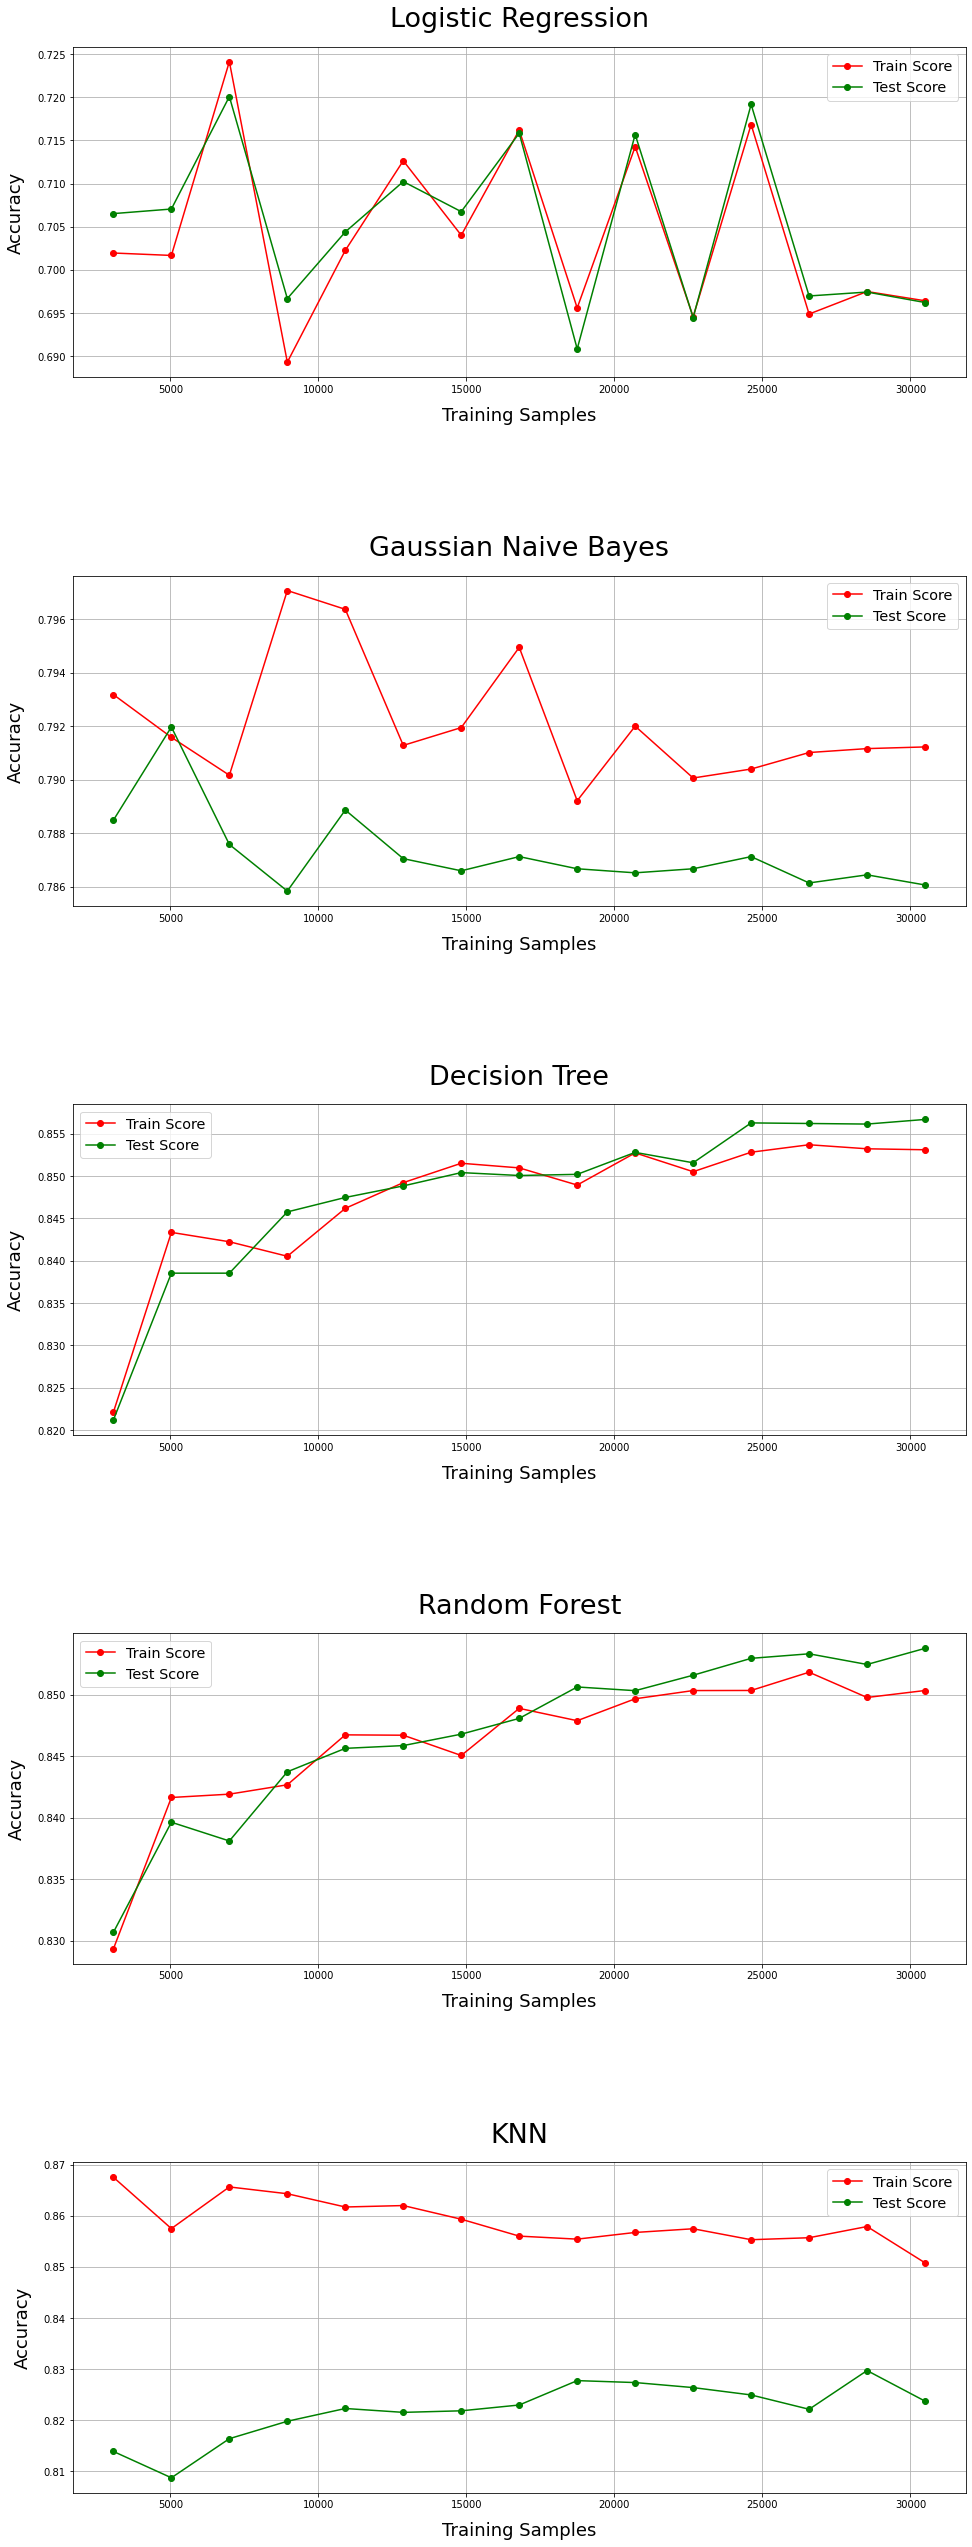

In [189]:
fig, ax = plt.subplots(5, 1, figsize = (16, 45))
plt.subplots_adjust(hspace = 0.6)
trainScore_all = []
testScore_all = []

for i, classifier in enumerate(model):
  trainScore, testScore = getScore(classifier)
  trainScore_all.append(trainScore)
  testScore_all.append(testScore)

  ax[i].set_xlabel('Training Samples', labelpad = 12, fontsize = 18)
  ax[i].set_ylabel('Accuracy', labelpad = 12, fontsize = 18)
  ax[i].set_title(f'{classifier}', pad = 20, fontsize = 27)
  ax[i].grid()

  ax[i].plot(trainSample, trainScore, 'o-', color='r', label = 'Train Score')
  ax[i].plot(trainSample, testScore, 'o-', color='g', label = 'Test Score')
  ax[i].legend(loc = 'best', fontsize = 'x-large')

plt.show()

In [190]:
df_maxacc.iloc[1,1]trainScore_mean = pd.DataFrame(np.mean(np.array(trainScore_all), axis = 1), columns = ['Mean Acc - Train'], index = model)
testScore_mean = pd.DataFrame(np.mean(np.array(testScore_all), axis = 1), columns = ['Mean Acc - Test'], index = model)
pd.concat([trainScore_mean, testScore_mean], axis = 1)

,Mean Acc - Train,Mean Acc - Test
Logistic Regression,0.704144,0.705217
Gaussian Naive Bayes,0.792108,0.787273
Decision Tree,0.847409,0.848045
Random Forest,0.846213,0.846909
KNN,0.858885,0.821944
